# Lesopdracht Seaborn
- Voer onderstaande cel uit om de dataset te laden.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
store_date = pd.read_csv('walmart.csv', parse_dates = ['Date'])
store_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   State         6435 non-null   object        
 2   City          6435 non-null   object        
 3   Date          6435 non-null   datetime64[ns]
 4   Type          6435 non-null   object        
 5   IsHoliday     6435 non-null   bool          
 6   Weekly_Sales  6435 non-null   float64       
 7   Size          6435 non-null   float64       
 8   Temperature   6435 non-null   float64       
 9   Fuel_Price    6435 non-null   float64       
 10  MarkDown1     2280 non-null   float64       
 11  MarkDown2     1637 non-null   float64       
 12  MarkDown3     2046 non-null   float64       
 13  MarkDown4     1965 non-null   float64       
 14  MarkDown5     2295 non-null   float64       
 15  CPI           6435 non-null   float64 

### Algemeen
In deze les maak je meerdere visualisaties. Zorg bij iedere visualisatie minimaal voor het volgende:
- grafiektitel
- x-as titel
- y-as titel
- Legenda (indien van toepassing)

### 1 Scatterplot temperatuur en omzet
- Voer onderstaande cel uit.
In deze cel wordt het dataframe st35 gemaakt met daarin de gegevens van winkel 35 van 2012. Ook wordt de correlatiecoefficient berekend tussen de temperatuur en de omzet van deze winkel.

In [6]:
st35 = store_date[(store_date['Year'] == 2012)&(store_date['Store'] == 35)]
corr = round(np.corrcoef(st35['Temperature'],st35['Weekly_Sales'] )[0,1], 2)
corr

0.73

- Maak met seaborn een scatterplot waarin je de relatie toont tussen de temperatuur (Temperature) en de omzet (Weekly_Sales). Zorg ervoor dat de stippen die betrekking hebben op een vakantieperiode (IsHoliday) een andere kleur hebben dan de andere stippen.
- Zorg o.a. voor een passende grafiektitel waarin de correlatiecoefficient wordt getoond.

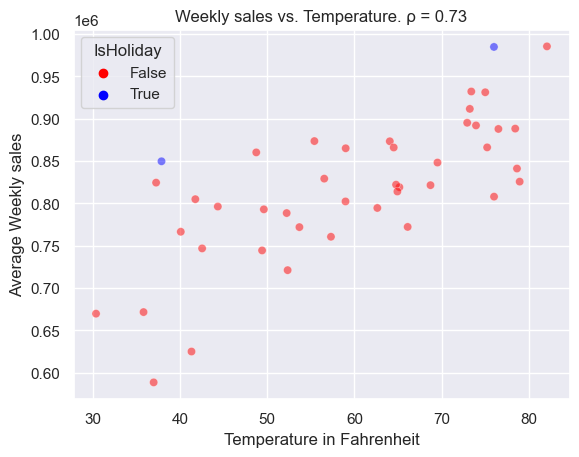

In [7]:
# sns.set(rc = {'figure.figsize':(5,5)})
sns.set_style("darkgrid")
sns.set_context("notebook")

g = sns.scatterplot(x = st35["Temperature"], y = st35["Weekly_Sales"], hue=st35["IsHoliday"],\
                alpha = 0.5, palette={True: "#0000ff", False : "#ff0000"})
g.set_title("Weekly sales vs. Temperature. ρ = " + str(corr))
g.set(xlabel= "Temperature in Fahrenheit", ylabel= "Average Weekly sales")

plt.show(g)

### 2 Meerdere scatterplots
- Voer onderstaande cel uit om st23_27 aan te maken. Hierin staan de gegevens van de winkels 23 tot en met 27.

In [3]:
st23_27 = store_date[store_date['Store'].isin([23,24,25,26,27])]
st23_27

,Store,State,City,Date,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week,Year,Month,MD Total
3146,23,Vermont,Montpelier,2010-02-05,B,False,1364721.58,114533.0,15.25,2.788,...,NaN,NaN,NaN,NaN,131.527903,5.892,5,2010,2,NaN
3147,23,Vermont,Montpelier,2010-02-12,B,True,1380892.08,114533.0,18.75,2.771,...,NaN,NaN,NaN,NaN,131.586613,5.892,6,2010,2,NaN
3148,23,Vermont,Montpelier,2010-02-19,B,False,1319588.04,114533.0,26.70,2.747,...,NaN,NaN,NaN,NaN,131.637000,5.892,7,2010,2,NaN
3149,23,Vermont,Montpelier,2010-02-26,B,False,1198709.65,114533.0,32.68,2.753,...,NaN,NaN,NaN,NaN,131.686000,5.892,8,2010,2,NaN
3150,23,Vermont,Montpelier,2010-03-05,B,False,1311175.93,114533.0,33.15,2.766,...,NaN,NaN,NaN,NaN,131.735000,5.892,9,2010,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,27,Nebraska,Lincoln,2012-09-28,A,False,1540687.63,204184.0,64.92,4.158,...,39.82,55.24,11296.93,12954.12,142.765750,8.239,39,2012,9,50652.14
3857,27,Nebraska,Lincoln,2012-10-05,A,False,1591816.88,204184.0,64.50,4.151,...,NaN,40.02,5385.32,6733.38,142.851683,8.000,40,2012,10,NaN
3858,27,Nebraska,Lincoln,2012-10-12,A,False,1660081.29,204184.0,55.40,4.186,...,NaN,7.22,863.01,7931.82,142.937617,8.000,41,2012,10,NaN
3859,27,Nebraska,Lincoln,2012-10-19,A,False,1620374.24,204184.0,56.53,4.153,...,NaN,4.77,575.48,3147.23,142.863363,8.000,42,2012,10,NaN


- Maak een visualisatie waarin je voor iedere winkel een scatterplot toont met daarbij temperatuur op de x-as en omzet op de y-as.

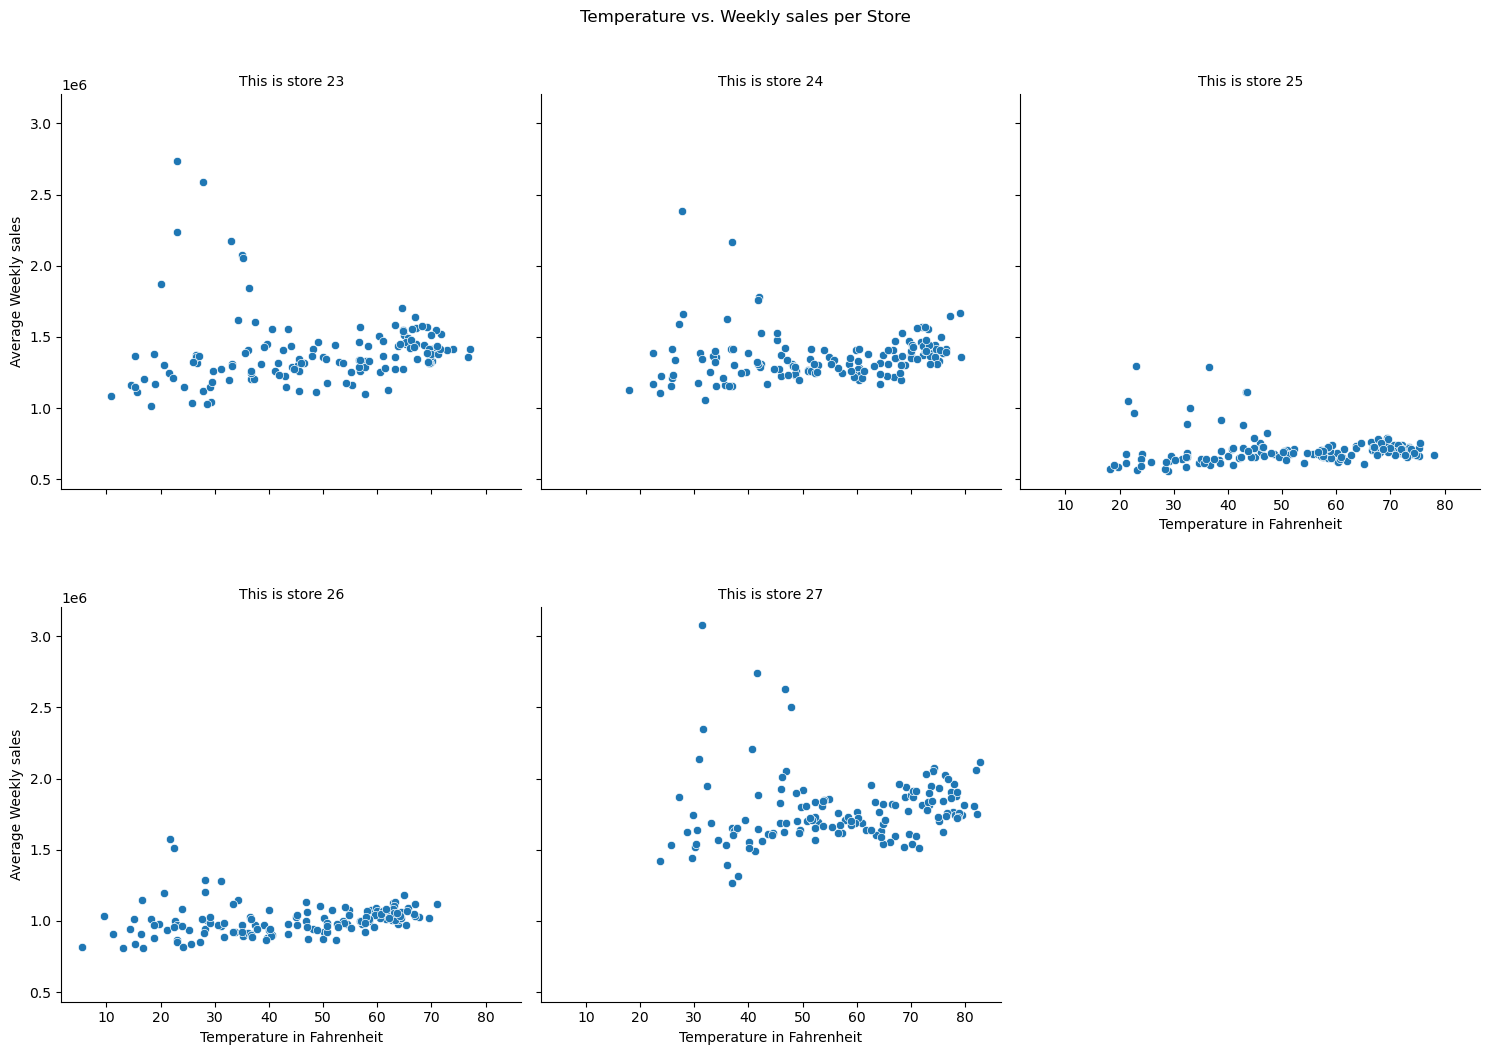

In [4]:
g = sns.relplot(x= st23_27['Temperature'], y= st23_27['Weekly_Sales'], col=st23_27['Store'], col_wrap= 3)
g.fig.suptitle("Temperature vs. Weekly sales per Store", y= 1.05)
g.set_titles("This is store {col_name}" )
g.set(xlabel= "Temperature in Fahrenheit", ylabel= "Average Weekly sales")
plt.subplots_adjust(hspace=0.3)

### 3 Stijl en kleuren
- Stel een stijl in waarbij de achtergrond van alle grafieken grijs is.
- Stel een kleurenpalet in dat geschikt is voor kleurenblinden.

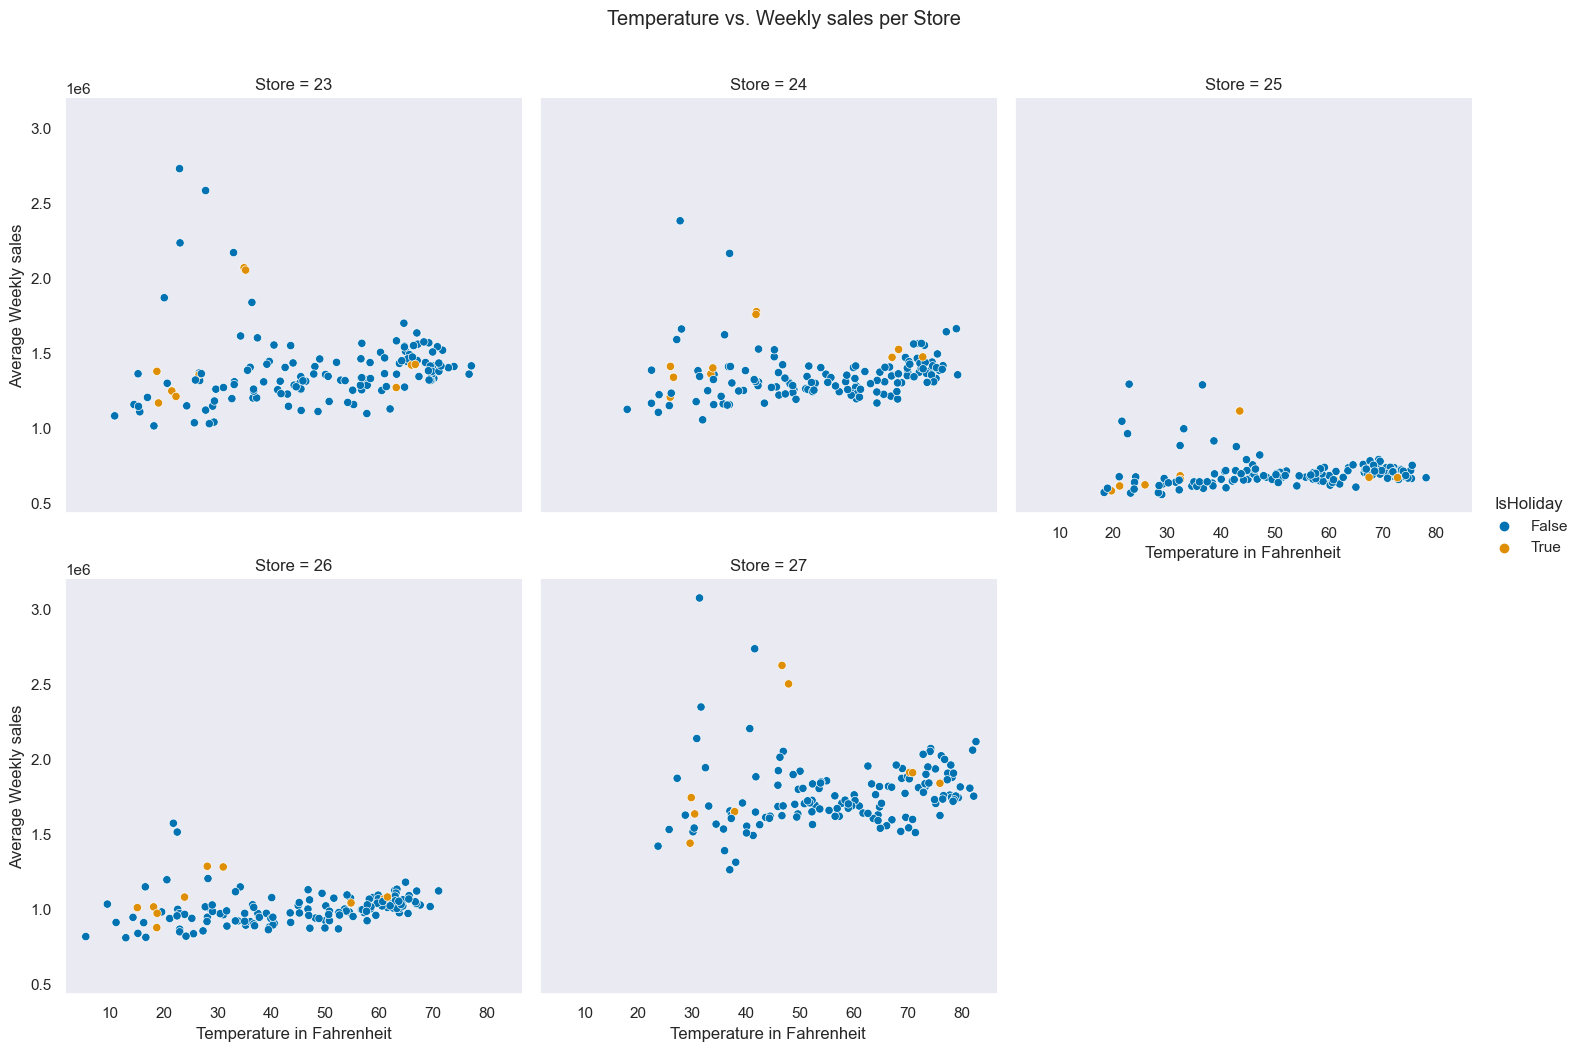

In [6]:
sns.set_style("dark")
sns.set_palette("colorblind")
g= sns.relplot(x= st23_27['Temperature'], y= st23_27['Weekly_Sales'], col=st23_27['Store'], col_wrap=3, hue=st23_27["IsHoliday"])
g.fig.suptitle("Temperature vs. Weekly sales per Store", y= 1.05)
g.set(xlabel= "Temperature in Fahrenheit", ylabel= "Average Weekly sales")
plt.show(g)

### 4 Bar charts en box plots
- Maak een bar chart waarin je de gemiddelde omzet per jaar toont.
- Maak een boxplot waarin je per jaar inzicht geeft in de verdeling van de omzet.
- Maak visualisatie waarbij voor iedere winkeltype (Type) een aparte barchart wordt getoond met daarin de gemiddelde omzet per jaar.
- Maak visualisatie waarbij voor iedere winkeltype (Type) een aparte boxplot wordt getoond met daarin de verdeling van de omzet per jaar.

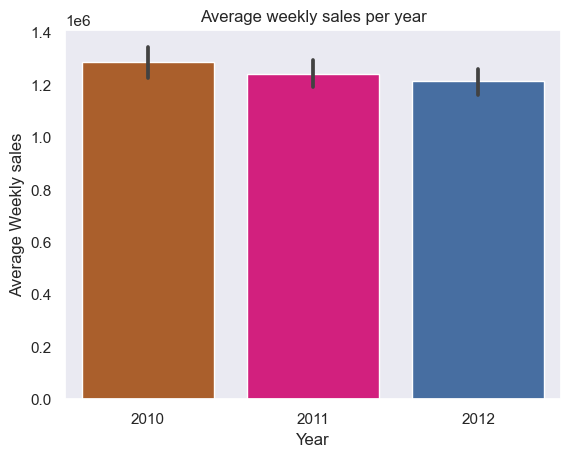

In [7]:
#Maak een bar chart waarin je de gemiddelde omzet per jaar toont.
sns.set_palette("Accent_r")
g= sns.barplot(x= st23_27["Year"], y= st23_27["Weekly_Sales"], estimator= np.mean)
g.set_title("Average weekly sales per year")
g.set(xlabel= "Year", ylabel= "Average Weekly sales")
plt.show(g)

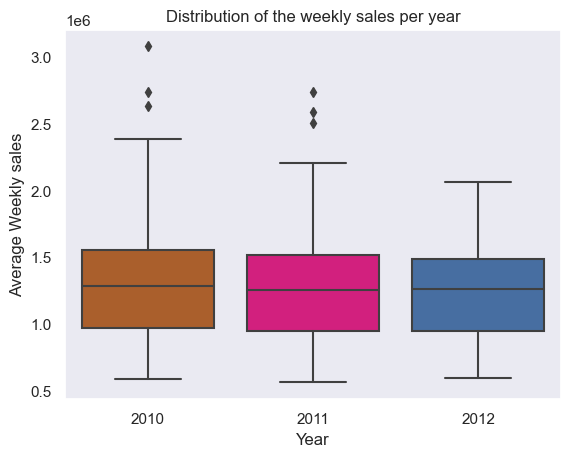

In [8]:
# Maak een boxplot waarin je per jaar inzicht geeft in de verdeling van de omzet.
g= sns.boxplot(x= st23_27["Year"], y= st23_27["Weekly_Sales"])
g.set_title("Distribution of the weekly sales per year")
g.set(xlabel= "Year", ylabel= "Average Weekly sales")
plt.show(g)

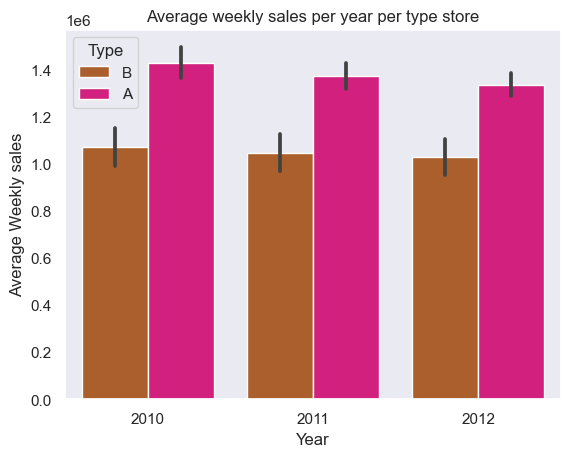

In [9]:
# Maak visualisatie waarbij voor iedere winkeltype (Type) een aparte barchart wordt getoond 
# met daarin de gemiddelde omzet per jaar.
sns.set_palette("Accent_r")
g= sns.barplot(x= st23_27["Year"], y= st23_27["Weekly_Sales"], estimator= np.mean, hue= st23_27["Type"])

g.set_title("Average weekly sales per year per type store")
g.set(xlabel= "Year", ylabel= "Average Weekly sales")
plt.show(g)

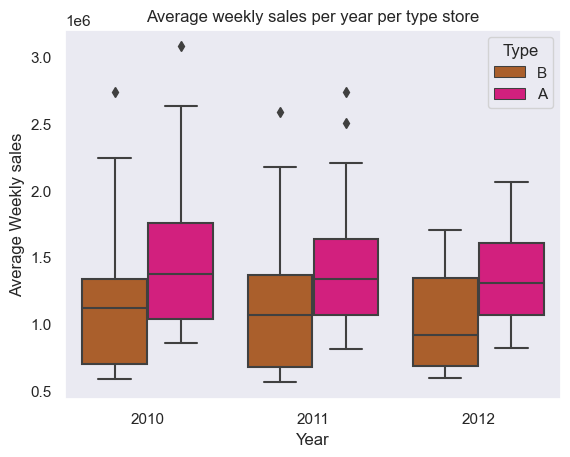

In [10]:
# Maak visualisatie waarbij voor iedere winkeltype (Type) een aparte boxplot wordt getoond 
# met daarin de verdeling van de omzet per jaar.

g= sns.boxplot(x= st23_27["Year"], y= st23_27["Weekly_Sales"], hue= st23_27["Type"])
g.set_title("Distribution of the weekly sales per year per type store")
g.set_title("Average weekly sales per year per type store")
g.set(xlabel= "Year", ylabel= "Average Weekly sales")

plt.show()

### 5 Omzet per jaar vergelijken
In de matplotlib opdracht heb je een grafiek gemaakt waarin je de omzet per week liet zien. Hierin toonde je 3 lijndiagrammen (voor ieder jaar een lijn) in 1 grafiek. Met Seaborn is deze grafiek veel makkelijker te maken omdat je de dataset niet eerst hoeft op te delen in meerdere dataframes.
- Maak de grafiek na met behulp van Seaborn.

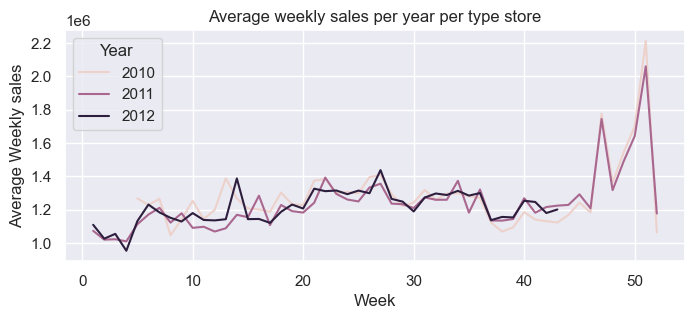

In [11]:
sns.set(rc = {'figure.figsize':(8,3)})
g= sns.lineplot(x= st23_27["Week"], y= st23_27["Weekly_Sales"], hue= st23_27["Year"], ci=None)
g.set_title("Total weekly sales per week per year", y= 1.05)
g.set_title("Average weekly sales per year per type store")
g.set(xlabel= "Week", ylabel= "Average Weekly sales")
plt.show()